<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
            Vaidehi Bulusu <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 8.1: Simple Linear Regression


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")
from datascience import *
%matplotlib inline
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact

# Simple Linear Regression

Let's learn about simple linear regression using a dataset you're already familiar with from week 2: the dataset on the price and quantity demanded of avocados. Recall that in week 2, we used `np.polyfit()` to find the slope and intercept. Here, we'll use regression to calculate the slope and intercept from scratch and get the same results!

Go over this lecture notebook along with the slides!

In [4]:
av_df = Table.read_table("avocados.csv")
av_df.show(5)

Date,Average Price,Total Volume
2015-12-27,1.05,692206
2015-12-20,1.15,637091
2015-12-13,1.22,616016
2015-12-06,1.06,694982
2015-11-29,1.05,651639


## Scatter Plot

To investigate the relationship between price and quantity demanded, we can start by creating a scatter plot:

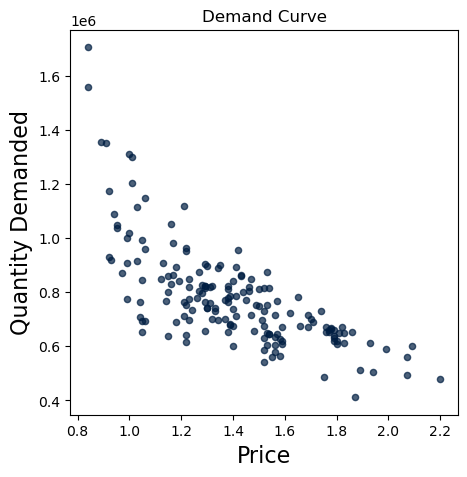

In [5]:
av_df.scatter("Average Price", "Total Volume")
plt.ylabel("Quantity Demanded")
plt.xlabel("Price")
plt.title("Demand Curve")
plt.show()

By looking at the scatter plot, we get a sense that there's a somewhat strong negative relationship between price and quantity demanded. Notice that the points don't all lie on a straight line as it's not a perfect association. This is because there is some random variation in the data plus there are factors other than price that affect the quantity demanded (we'll talk more about this later).

## Correlation Coefficient

To quantify the association and give it a numerical value, we can calculate the correlation coefficient between price and quantity demanded. Recall from DATA 8 that the correlation coefficient only measures **linear** association so for the purpose of this class, we are assuming that the relationship between the price and quantity demanded of avocados is linear (in reality, it may be nonlinear).

Let's start by defining a function to calculate the correlation coefficient.

In [6]:
# Assumes that array_x and array_y are in standard units
def correlation(array_x, array_y):
    return np.mean(array_x * array_y)

The first step in calculating the correlation coefficient is converting the data to standard units. When you express a value in standard units, you are basically standardizing the variable by expressing it in terms of the number of standard deviations it is above or below the mean (you can think of this as the "distance" from the mean). For example, the first value of the price shown below is around 1.2 standard deviations below the mean price.

Expressing the data in standard units removes the measured units (e.g. dollars) from the data. So, the correlation coefficient is not affected by a change in the units/scale (e.g. if you convert the prices from USD to CAD).

In [7]:
# Expressing price in standard units
price_su = (av_df["Average Price"] - np.mean(av_df["Average Price"]))/np.std(av_df["Average Price"])
price_su[:5]

array([-1.20591058, -0.85854585, -0.61539054, -1.17117411, -1.20591058])

In [8]:
# Expressing quantity in standard units
quantity_su = (av_df["Total Volume"] - np.mean(av_df["Total Volume"]))/np.std(av_df["Total Volume"])
quantity_su[:5]

array([-0.46845706, -0.75816545, -0.86894507, -0.4538647 , -0.68169935])

Now we can use the function we defined to calculate the correlation coefficient:

In [9]:
r = correlation(price_su, quantity_su)
r

-0.72092404736818161

As we expected, there is a pretty strong negative correlation between price and demand! It aligns with what we saw in the scatter plot.

## Regression Equation

Let's use the correlation coefficient to build the regression equation. The first step is to calculate the slope and intercept:

In [10]:
slope = r * np.std(av_df["Total Volume"])/np.std(av_df["Average Price"])
slope

-476412.71898207709

In [11]:
intercept = np.mean(av_df["Total Volume"]) - (slope * np.mean(av_df["Average Price"]))
intercept

1446951.6408050179

We can now write the regression equation for the relationship between price and quantity demanded.

$$\hat{quantity} = 1446951.641 -476412.719\hat{price}$$

This equation allows you to do 2 things:

- Quantify the association between price and quantity demanded: as price increases by $1, the quantity demanded decreases by around 476,000 units (avocados)


- Predict values of quantity demanded: this is especially useful for values of price that are not already in the dataset

Note that the regression line is the line of best fit for your data (more on this later). We can plot this line of best fit on the scatter plot from before:

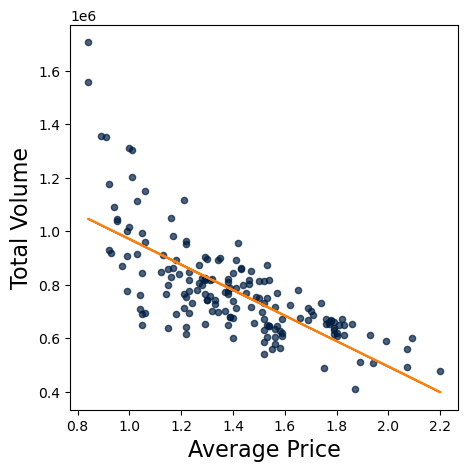

In [12]:
av_df.scatter("Average Price", "Total Volume")
plt.plot(av_df["Average Price"], slope * av_df["Average Price"] + intercept, color='tab:orange')
plt.show()

Does this graph look familiar? You've already done a similar analysis in week 2 when you used `np.polyfit` to find the slope and intercept of the line of best fit!

In [13]:
params = np.polyfit(av_df["Average Price"], av_df["Total Volume"], 1)
params

array([ -476412.71898208,  1446951.64080502])

The slope and intercept you get from `np.polyfit` should be very close to the slope and intercept from before (there might be some tiny variation). This is because under the hood, np.polyfit is using simple linear regression to calculate the parameters.

In [14]:
slope_param = params[0]
np.round(slope_param, 5) == np.round(slope, 5)

True

In [15]:
intercept_param = params[1]
np.round(intercept_param, 5) == np.round(intercept, 5)

True

## RMSE

Let's use the slope and intercept to generate predictions for the quantity demanded:

In [16]:
predicted_quantity = intercept + (slope * av_df["Average Price"])
predicted_quantity[:5]

array([ 946718.28587384,  899077.01397563,  865728.12364688,
        941954.15868402,  946718.28587384])

We want our predictions to be as accurate as possible. One metric we can use to measure the accuracy of our predictions is the root mean squared error (RMSE) which gives us a sense of how far our predictions are from the actual values, on average.

Let's define a function for calculating the RMSE of our data (note that this function is specific to the avocados dataset).

In [17]:
def rmse_p_q(slope, intercept):
    predicted_y = intercept + (slope * av_df["Average Price"])
    return (np.mean((av_df["Total Volume"] - predicted_y)**2))**0.5

In [18]:
rmse_1 = rmse_p_q(slope, intercept)
rmse_1

131840.90403368854

On average, our predictions are off by about $132,000. This is a pretty high RMSE! This shows that even though price and quantity demanded have a pretty high correlation (about 0.72), it doesn't necessarily mean that price is a good predictor for the quantity demanded.

We said earlier that the regression line is the line of best fit. The reason why is that the regression line minimizes the RMSE of your data. In other words, among all the lines you can use to model your data, the regression line is the one that is the most accurate as it minimizes RMSE – this is why this technique is called (ordinary) least squares regression.

We can test this using the minimize function. Recall that minimize takes a function as the input as gives you values of the arguments of that function that minimize it. Below, we would expect the output of the minimize function to be similar to the slope and intercept we calculated:

In [19]:
minimum = minimize(rmse_p_q)
minimum

array([ -476413.16110176,  1446952.20081605])

The slope and intercept from the minimize function is very similar to the slope and intercept we calculated, as expected!

When you perform regression in Python (e.g. when you use `np.polyfit`), it tries to find the values of the slope and intercept that minimize the RMSE. You can build your intuition for how it does this by playing around with this slider from [last semester's notebook](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdata-88e%2Fecon-sp21&urlpath=tree%2Fecon-sp21%2Flec%2Flec12%2Flec12.ipynb&branch=main) (you can also find the link in on last semester's [website](https://data-88e.github.io/sp21/), in econometrics week). See if you can find values for the slope and intercept that minimize the squared error area.

In [21]:
d = Table().with_columns(
    'x', make_array(0,  1,  2,  3,  4),
    'y', make_array(1, .5, -1,  2, -3))

def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

def plot_line_and_errors(slope, intercept):
    print("RMSE:", rmse(slope * d.column('x') + intercept, d.column('y')))
    plt.figure(figsize=(5,5))
    points = make_array(-2, 7)
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    ax = p[0].axes
    
    predicted_ys = slope*d.column('x') + intercept
    diffs = predicted_ys - d.column('y')
    for i in np.arange(d.num_rows):
        x = d.column('x').item(i)
        y = d.column('y').item(i)
        diff = diffs.item(i)
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

## Regression in Python

So far, we've looked at the DATA 8 version of regression in which we calculated the correlated coefficient and used it to find the slope and intercept of our regression line.

Now we can look at how regression is actually performed in Python using a library called `statsmodels`.

In [22]:
# import statsmodels.api as sm – see first cell in the notebook
x_1 = av_df.column("Average Price") # Selecting the independent variable(s)
y_1 = av_df.column("Total Volume") # Selecting the dependent variable
model_1 = sm.OLS(y_1, sm.add_constant(x_1)) # Performing OLS regression – make sure to include intercept using sm.add_constant
result_1 = model_1.fit() # Fitting the model
result_1.summary() # Showing a summary of the results of the regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.16e-28
Time:                        00:15:32   Log-Likelihood:                -2232.2
No. Observations:                 169   AIC:                             4468.
Df Residuals:                     167   BIC:                             4475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.447e+06   5.06e+04     28.622      0.000    1.35e+06    1.55e+06
x1         -4.764e+05   3.54e+04    -13.443      0.000   -5.46e+05   -4.06e+05
==============================================================================
Omnibus:                       50.900   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.997
Skew:                           1.161   Prob(JB):                     4.03e-36
Kurtosis:                       7.213   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's look at the parameters (slope and intercept) of the regression and see if they are close to the parameters we calculated before:

In [23]:
type(result_1.params)

numpy.ndarray

In [24]:
np.round(result_1.params[0], 5) == np.round(intercept, 5)

True

In [25]:
np.round(result_1.params[1], 5) == np.round(slope, 5)

True

They are similar, as we expected!

## Hypothesis Testing

Since we are interested in whether or not there is a substantial association between x and y (in this case, price and quantity demanded), we can frame this as a hypothesis testing question:

- The null hypothesis would be that there isn't a substantial association between x and y ($\beta = 0$)

- The alternative hypothesis would be that there is a substantial association between x and y ($\beta ≠ 0$)

Go back to the regression output from before: notice that it shows a 95% confidence interval for the slope. Let's try to visualize this confidence interval by creating a distribution of the regression slopes:

Center of the distribution (mean): -476370.810774
Standard deviation: 48836.8406327


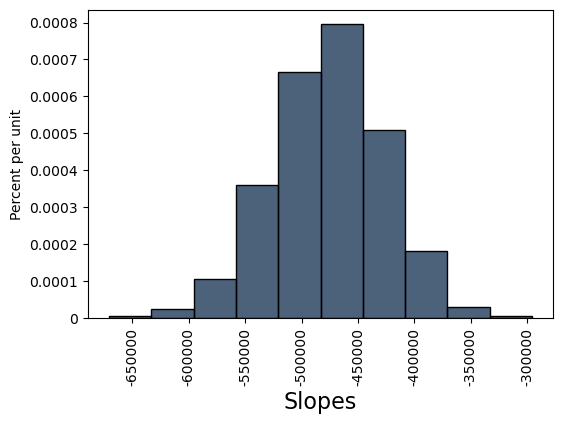

In [26]:
slopes_array = make_array()
for i in np.arange(5000):
    bootstrapped_sample = av_df.select("Average Price", "Total Volume").sample()
    x = bootstrapped_sample.column("Average Price")
    y = bootstrapped_sample.column("Total Volume")
    results = sm.OLS(y, sm.add_constant(x)).fit()
    slopes_array = np.append(results.params[1], slopes_array)
Table().with_column("Slopes", slopes_array).hist()
print("Center of the distribution (mean):", np.mean(slopes_array))
print("Standard deviation:", np.std(slopes_array))

In [27]:
ci_lower_bound = percentile(2.5, slopes_array)
ci_lower_bound

-573634.48749775742

In [28]:
ci_upper_bound = percentile(97.5, slopes_array)
ci_upper_bound

-382762.68737071473

Notice that the center of the distribution (average of the slopes) is similar to the slope from the regression output. The lower and upper bounds of the confidence interval are also similar.

Recall that if the confidence interval contains 0, it means that there is evidence for the null hypothesis at the 5% significance level. If it doesn't contain 0, it means that there is evidence against the null hypothesis at the 5% level.

The confidence interval in the regression output above doesn't contain 0 so there's evidence that price and quantity demanded have a significant association. This makes sense as they have a relatively high correlation coefficient.